## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn import preprocessing
import itertools
from sklearn.metrics import precision_recall_curve,average_precision_score, accuracy_score,roc_curve,roc_auc_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

## Importing dataset

In [3]:
df = pd.read_csv('../data/heart_2020_cleaned.csv')

## Exploratory Analysis

In [4]:
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [7]:
df.describe(include='object')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


In [8]:
df.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


In [9]:
l=df.shape[0] ## no of observations

### Target (HeartDisease)

In [10]:
df['HeartDisease'].value_counts()/l*100  #in percentage

No     91.440454
Yes     8.559546
Name: HeartDisease, dtype: float64

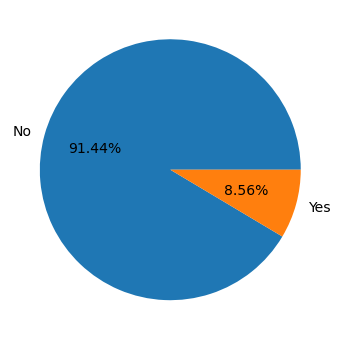

In [11]:
fig,ax = plt.subplots(figsize=(10,6))
labels = df['HeartDisease'].unique()

ax.pie(df['HeartDisease'].value_counts(), labels=labels,autopct='%1.2f%%',textprops = {"fontsize":14})
plt.show()

In [12]:
## 8.5% are at a risk of heart disease out of the total(319795). So we have to keep this in mind that it is a imbalanced dataset

### Features

In [13]:
dummy_df=df.copy()

In [14]:
dummy_df.loc[dummy_df['HeartDisease'] =='Yes','HeartDisease']=1
dummy_df.loc[dummy_df['HeartDisease'] == 'No','HeartDisease']=0

#### BMI

In [15]:
df['BMI'].describe()

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64

<AxesSubplot:xlabel='BMI'>

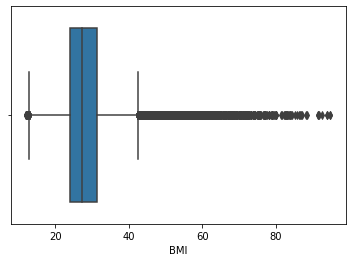

In [16]:
sns.boxplot(data=df, x='BMI')

In [17]:
## it has a lot of spread in the data, let us make it categorical based on the health industry specifications

In [18]:
t=df['BMI']
cond = [(t.between(0,18.5)),(t.between(18.5,24.9)),(t.between(24.9,29.9)),(t.between(29.9,34.9)), (t.between(34.9,100))]

labels = ['Uwt','N','Owt','O','EO']    # Uwt-underweight, N-normal, Owt-overweight, O-Obese, EO-extremely obese 

df['BMI_cat'] = np.select(cond,labels)

In [19]:
df.drop(columns=['BMI'],inplace=True)

In [20]:
df['BMI_cat'].value_counts()

Owt    114752
N       95134
O       62172
EO      42623
Uwt      5114
Name: BMI_cat, dtype: int64

In [21]:
## we have more people that are overweight which matches with the avg BMI of the US, where the data is from.

In [22]:
dummy_df['BMI_cat']=df['BMI_cat']
t1=dummy_df[["HeartDisease",'BMI_cat']].groupby(['BMI_cat'],as_index=False).mean()

<AxesSubplot:xlabel='BMI_cat', ylabel='HeartDisease'>

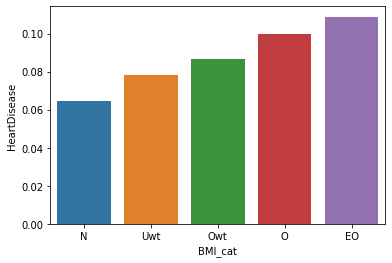

In [23]:
sns.barplot(data=t1.sort_values(by='HeartDisease'),x='BMI_cat',y='HeartDisease')

In [24]:
## here we see that Extremely obese people have higher risk of heart disease, also underweight people also have it higher than
## normal ones, which some recent studies also show

#### PhysicalHealth

In [25]:
df['PhysicalHealth'].describe()

count    319795.00000
mean          3.37171
std           7.95085
min           0.00000
25%           0.00000
50%           0.00000
75%           2.00000
max          30.00000
Name: PhysicalHealth, dtype: float64

<AxesSubplot:xlabel='PhysicalHealth'>

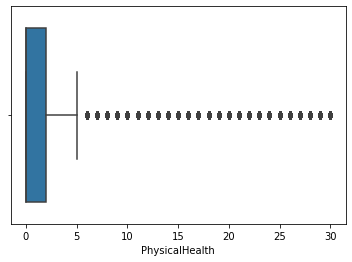

In [26]:
sns.boxplot(data=df, x='PhysicalHealth')

<AxesSubplot:xlabel='PhysicalHealth', ylabel='Density'>

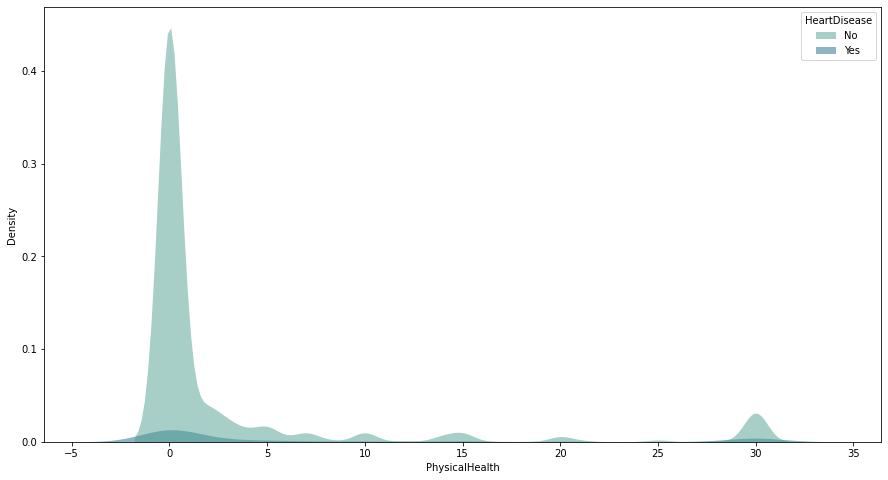

In [27]:
fig, ax = plt.subplots(figsize = (15,8))
sns.kdeplot(data=df, x='PhysicalHealth', hue='HeartDisease', fill=True, palette="crest", alpha=.5, linewidth=0)

In [28]:
## here the plots [P(X|Y=No)P(Y=No) and P(X|Y=Yes)P(Y=Yes), where X is the PhysicalHealth] take into account the prior prob of
## each class(P(Y=No) and P(Y=Yes) respectively),thus due to the imbalance, the prob plot for the majority class would always 
## be higher than the minority.
## { 
##   Due to this reason only, a classifier predicting based on the baysian prob [P(Y=Yes|X) = P(X|Y=Yes)P(Y=Yes)/P(X) and 
##   P(Y=No|X) = P(X|Y=No)P(Y=No)/P(X)] would choose the majority class only and get high accuracy 
##    [since P(Y=No|X) > P(Y=Yes|X), i.e., 'No' class is always more likely than the 'Yes' class for a given X]
## }

In [29]:
## Thus let us look the the probability independently for the classes (P(X|Y=No) and P(X|Y=Yes)), i.e., not taking into 
## account the prior prob, to better see the effect of X on the classes

<AxesSubplot:xlabel='PhysicalHealth', ylabel='Density'>

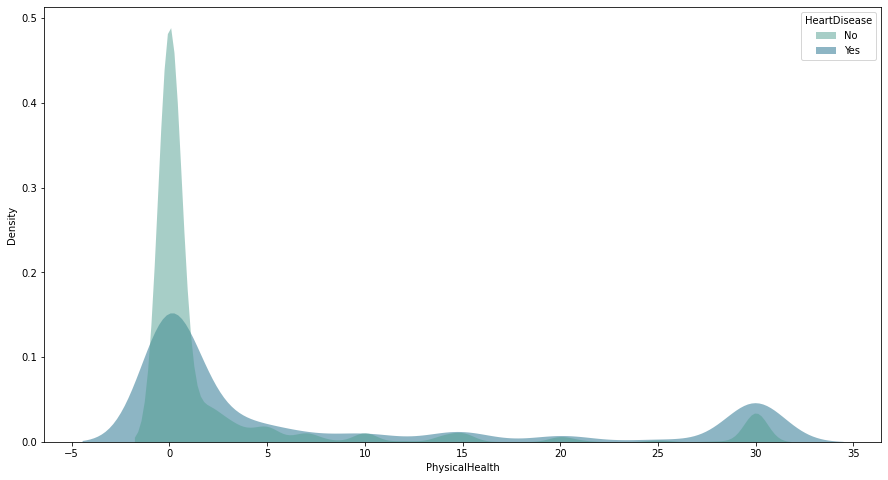

In [30]:
fig, ax = plt.subplots(figsize = (15,8))
sns.kdeplot(data=df, x='PhysicalHealth', hue='HeartDisease', fill=True, common_norm=False, palette="crest", alpha=.5, linewidth=0)

In [31]:
## From this plot we can see that the prob for people with heart disease being healthy for the pass 30 days (X=0) is lower than
## the people with no heart disease, whereas it increases above that and is much more near the 30 mark (ill past 30 days)

<AxesSubplot:xlabel='HeartDisease', ylabel='PhysicalHealth'>

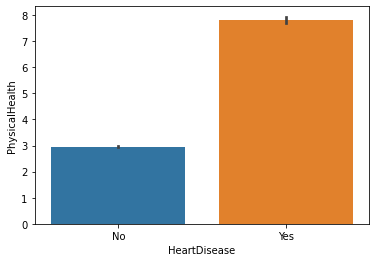

In [32]:
sns.barplot(y='PhysicalHealth',data=df,x='HeartDisease')

In [33]:
## the mean sick days(in 30 days) are significantly higher for people with heart disease

#### MentalHealth

In [34]:
df['MentalHealth'].describe()

count    319795.000000
mean          3.898366
std           7.955235
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          30.000000
Name: MentalHealth, dtype: float64

<AxesSubplot:xlabel='MentalHealth'>

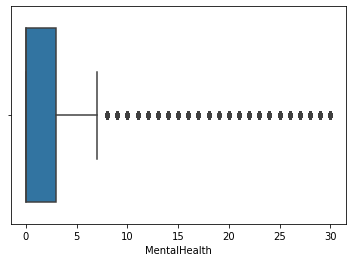

In [35]:
sns.boxplot(data=df, x='MentalHealth')

<AxesSubplot:xlabel='MentalHealth', ylabel='Density'>

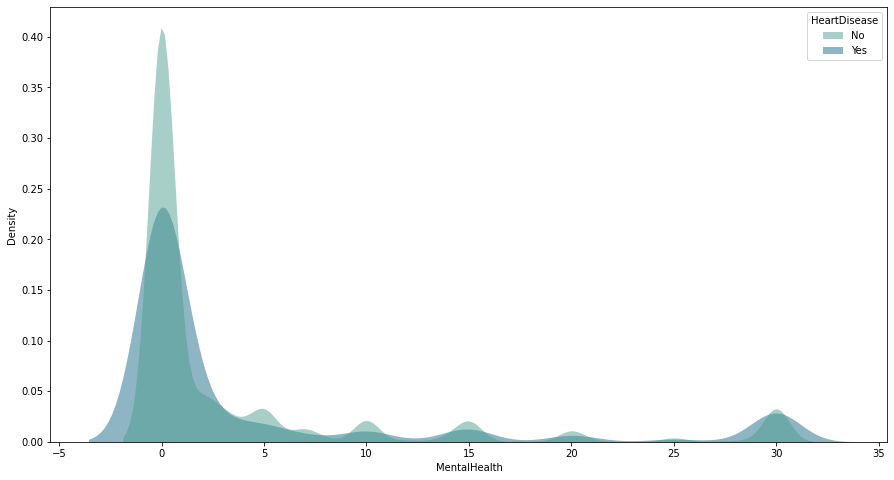

In [36]:
fig, ax = plt.subplots(figsize = (15,8))
sns.kdeplot(data=df, x='MentalHealth', hue='HeartDisease', fill=True, common_norm=False, palette="crest", alpha=.5, linewidth=0)

In [37]:
## even for more days of bad mental health the prob is around the same or even lower for heart disease people than the ones
## with no heart problem, a reason for that could be that many people nowadays face bad mental health problems, but all wont
## have the heart problem.

<AxesSubplot:xlabel='HeartDisease', ylabel='MentalHealth'>

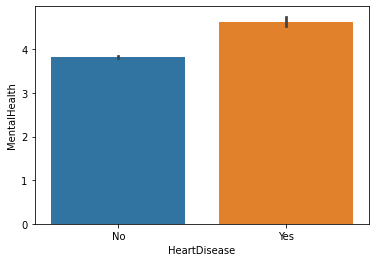

In [38]:
sns.barplot(y='MentalHealth',data=df,x='HeartDisease')

In [39]:
## The difference in mean days for bad mental health is also around the same for both the cases, which could mean that mental 
## health might not be a big factor for the heart disease, and thus we can drop it for the model

In [40]:
df.drop(columns='MentalHealth', inplace=True)

#### SleepTime

In [41]:
df['SleepTime'].describe()

count    319795.000000
mean          7.097075
std           1.436007
min           1.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          24.000000
Name: SleepTime, dtype: float64

In [42]:
## the max is 24! The central value is around 7 hours

In [43]:
df['SleepTime'].value_counts()

7.0     97751
8.0     97602
6.0     66721
5.0     19184
9.0     16041
10.0     7796
4.0      7750
12.0     2205
3.0      1992
2.0       788
1.0       551
11.0      415
14.0      243
16.0      236
15.0      189
18.0      102
13.0       97
20.0       64
24.0       30
17.0       21
22.0        9
19.0        3
23.0        3
21.0        2
Name: SleepTime, dtype: int64

<AxesSubplot:xlabel='SleepTime'>

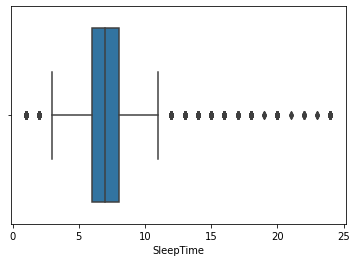

In [44]:
sns.boxplot(data=df, x='SleepTime')

<AxesSubplot:xlabel='SleepTime', ylabel='Density'>

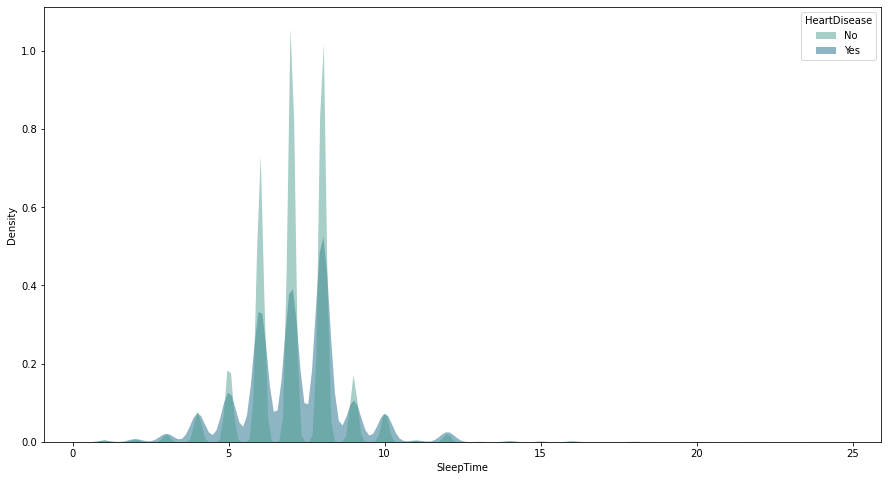

In [45]:
fig, ax = plt.subplots(figsize = (15,8))
sns.kdeplot(data=df, x='SleepTime', hue='HeartDisease', fill=True, common_norm=False, palette="crest", alpha=.5, linewidth=0)

In [46]:
t2=dummy_df[["HeartDisease",'SleepTime']].groupby(['SleepTime'],as_index=False).mean()

<AxesSubplot:xlabel='SleepTime', ylabel='HeartDisease'>

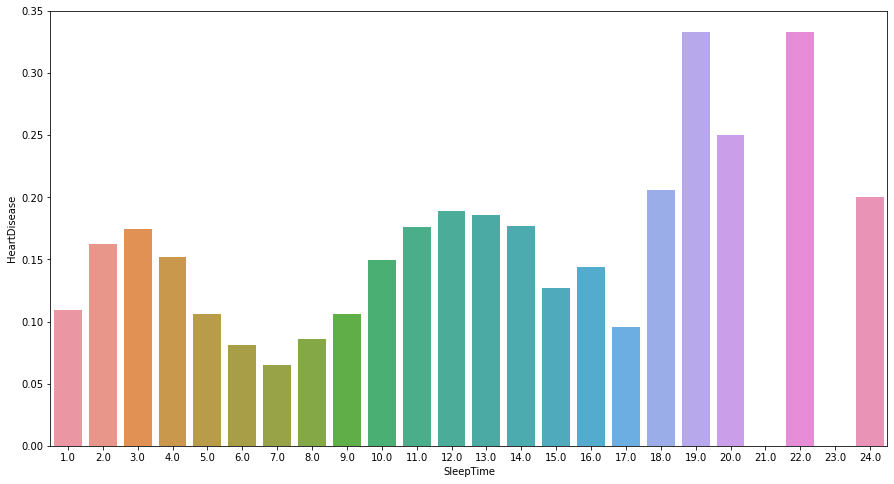

In [47]:
fig, ax = plt.subplots(figsize = (15,8))
sns.barplot(data=t2.sort_values(by='HeartDisease'),x='SleepTime',y='HeartDisease')

In [48]:
## we can see from the above plots that the people with less sleep time or more than the avg sleep time (7hrs) have higher
## risk of heart disease

In [49]:
## Considering the spread and the outliers & also its trend on the target, it would be best to bin this feature

In [50]:
st=df['SleepTime']
cond = [(st.between(0,6)),(st.between(6,9)),(st.between(9,24))]

labels = ['Low','Normal','High']

df['SleepTime_cat'] = np.select(cond,labels)

In [51]:
df.drop(columns=['SleepTime'],inplace=True)

In [52]:
df['SleepTime_cat'].value_counts()

Normal    211394
Low        96986
High       11415
Name: SleepTime_cat, dtype: int64

In [53]:
dummy_df['SleepTime_cat']=df['SleepTime_cat']
t3=dummy_df[["HeartDisease",'SleepTime_cat']].groupby(['SleepTime_cat'],as_index=False).mean()

<AxesSubplot:xlabel='SleepTime_cat', ylabel='HeartDisease'>

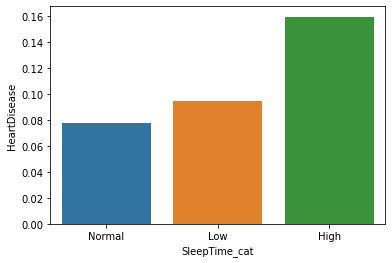

In [54]:
sns.barplot(data=t3.sort_values(by='HeartDisease'),x='SleepTime_cat',y='HeartDisease')

#### Smoking

In [55]:
df['Smoking'].value_counts()

No     187887
Yes    131908
Name: Smoking, dtype: int64

In [56]:
t4=dummy_df[["HeartDisease",'Smoking']].groupby(['Smoking'],as_index=False).mean()

<AxesSubplot:xlabel='Smoking', ylabel='HeartDisease'>

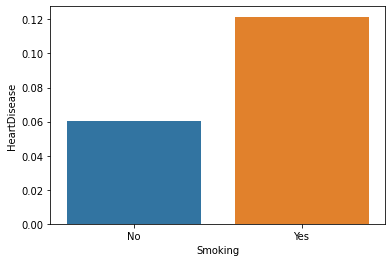

In [57]:
sns.barplot(data=t4.sort_values(by='HeartDisease'),x='Smoking',y='HeartDisease')

In [58]:
## Smoking leads to greater heart risk. Another reason to quit it!

#### AlcoholDrinking

In [59]:
df['AlcoholDrinking'].value_counts()/l*100

No     93.190325
Yes     6.809675
Name: AlcoholDrinking, dtype: float64

In [60]:
t5=dummy_df[["HeartDisease",'AlcoholDrinking']].groupby(['AlcoholDrinking'],as_index=False).mean()

<AxesSubplot:xlabel='AlcoholDrinking', ylabel='HeartDisease'>

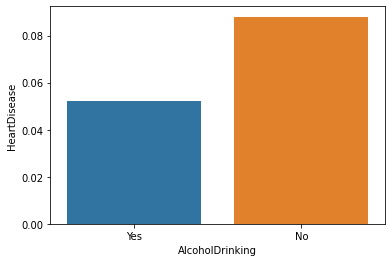

In [61]:
sns.barplot(data=t5.sort_values(by='HeartDisease'),x='AlcoholDrinking',y='HeartDisease')

In [62]:
## Since there are very few heavy drinkers (6.8%), so people with high heart problem risk dont look to be influenced by heavy drinking

In [63]:
df[df['AlcoholDrinking']=='Yes']['HeartDisease'].value_counts()

No     20636
Yes     1141
Name: HeartDisease, dtype: int64

In [64]:
df['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [65]:
## Only 4% (1141/27373*100) of people with heart disease are heavy drinkers, so this might not be that good indicator for heart disease, and
## it's better to drop it

In [66]:
df.drop(columns='AlcoholDrinking', inplace=True)

#### Stroke

In [67]:
df['Stroke'].value_counts()/l*100

No     96.22602
Yes     3.77398
Name: Stroke, dtype: float64

In [68]:
t6=dummy_df[["HeartDisease",'Stroke']].groupby(['Stroke'],as_index=False).mean()

<AxesSubplot:xlabel='Stroke', ylabel='HeartDisease'>

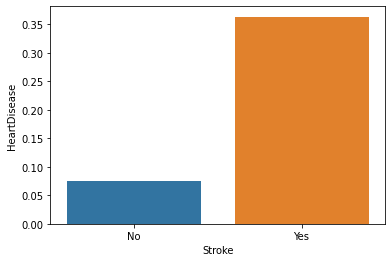

In [69]:
sns.barplot(data=t6.sort_values(by='HeartDisease'),x='Stroke',y='HeartDisease')

In [70]:
## So a past stroke could be a big indicator for heart disease

#### DiffWalking

In [71]:
df['DiffWalking'].value_counts()/l*100

No     86.112979
Yes    13.887021
Name: DiffWalking, dtype: float64

In [72]:
t7=dummy_df[["HeartDisease",'DiffWalking']].groupby(['DiffWalking'],as_index=False).mean()

<AxesSubplot:xlabel='DiffWalking', ylabel='HeartDisease'>

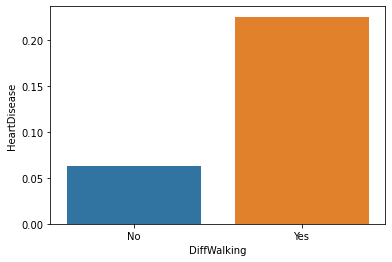

In [73]:
sns.barplot(data=t7.sort_values(by='HeartDisease'),x='DiffWalking',y='HeartDisease')

In [74]:
## Difficulty in walking is also a good indicator for heart problem

#### Sex

In [75]:
df['Sex'].value_counts()/l*100

Female    52.472678
Male      47.527322
Name: Sex, dtype: float64

In [76]:
t8=dummy_df[["HeartDisease",'Sex']].groupby(['Sex'],as_index=False).mean()

<AxesSubplot:xlabel='Sex', ylabel='HeartDisease'>

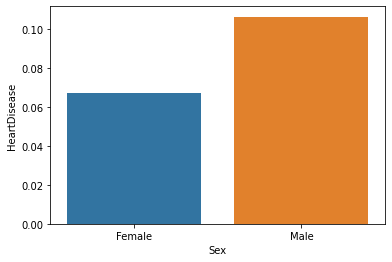

In [77]:
sns.barplot(data=t8.sort_values(by='HeartDisease'),x='Sex',y='HeartDisease')

#### AgeCategory	

In [78]:
df['AgeCategory'].value_counts()/l*100

65-69          10.679029
60-64          10.533623
70-74           9.714036
55-59           9.305024
50-54           7.936960
80 or older     7.552651
45-49           6.814053
75-79           6.717428
18-24           6.586720
40-44           6.568583
35-39           6.425992
30-34           5.864069
25-29           5.301834
Name: AgeCategory, dtype: float64

In [79]:
t9=dummy_df[["HeartDisease",'AgeCategory']].groupby(['AgeCategory'],as_index=False).mean()

<AxesSubplot:xlabel='AgeCategory', ylabel='HeartDisease'>

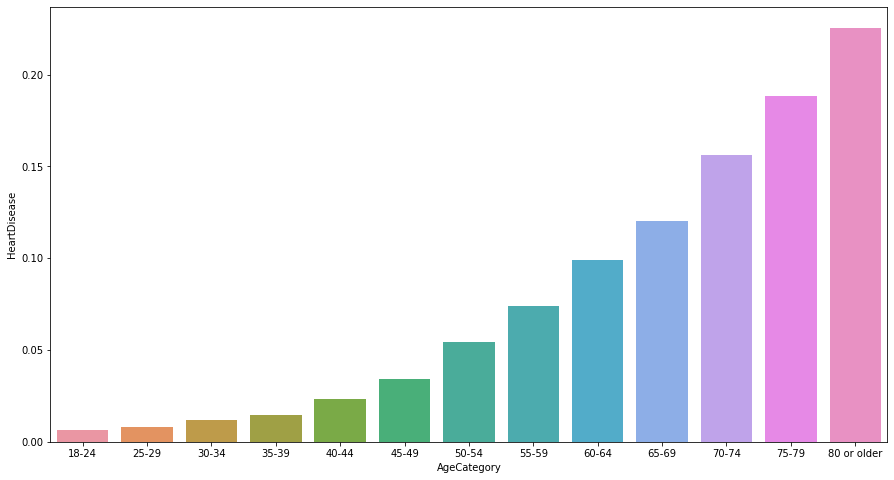

In [80]:
fig, ax = plt.subplots(figsize = (15,8))
sns.barplot(data=t9.sort_values(by='HeartDisease'),x='AgeCategory',y='HeartDisease')

In [81]:
## we could see here that the risk of heart disease increases with age

In [82]:
## Let us replace the category of Age with the mean value in that range (or we can do encoding aswell)

In [83]:
AgeCategory_mean = {'18-24':21,'25-29':27,'30-34':32,'35-39':37,'40-44':42,'45-49':47,'50-54':52,'55-59':57, 
                    '60-64':62,'65-69':67,'70-74':72,'75-79':77,'80 or older':80}

df['Mean_Age'] = df['AgeCategory'].apply(lambda x: AgeCategory_mean[x])

In [84]:
df.drop(columns=['AgeCategory'],inplace=True)

#### Race	

In [85]:
df['Race'].value_counts()/l*100

White                             76.677872
Hispanic                           8.582373
Black                              7.173033
Other                              3.417189
Asian                              2.522866
American Indian/Alaskan Native     1.626667
Name: Race, dtype: float64

In [86]:
t10=dummy_df[["HeartDisease",'Race']].groupby(['Race'],as_index=False).mean()

<AxesSubplot:xlabel='Race', ylabel='HeartDisease'>

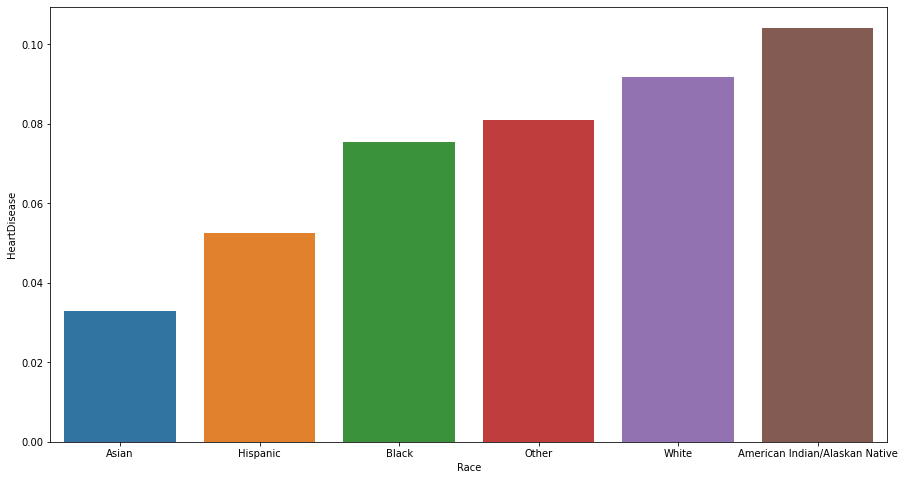

In [87]:
fig, ax = plt.subplots(figsize = (15,8))
sns.barplot(data=t10.sort_values(by='HeartDisease'),x='Race',y='HeartDisease')

In [88]:
## The Native Americans look to be at higher risk of the heart disease, which according to recent reports by CDC also is shown
## that heart disease is a leading cause of death amongst them and they are more likely to develop a heart issue than the white
## people. The asians seem to be having the lowest risk for a heart disease.

#### Diabetic	

In [89]:
df['Diabetic'].value_counts()/l*100

No                         84.320580
Yes                        12.758799
No, borderline diabetes     2.120421
Yes (during pregnancy)      0.800200
Name: Diabetic, dtype: float64

In [90]:
t11=dummy_df[["HeartDisease",'Diabetic']].groupby(['Diabetic'],as_index=False).mean()

<AxesSubplot:xlabel='Diabetic', ylabel='HeartDisease'>

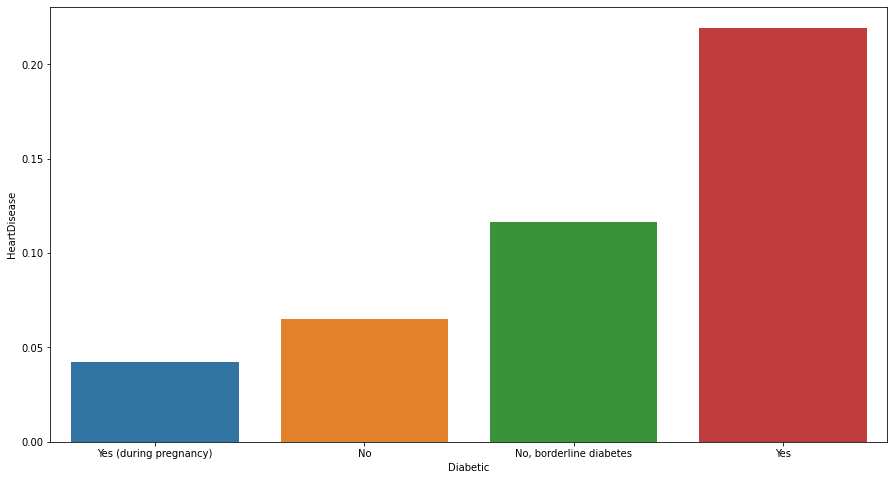

In [91]:
fig, ax = plt.subplots(figsize = (15,8))
sns.barplot(data=t11.sort_values(by='HeartDisease'),x='Diabetic',y='HeartDisease')

In [92]:
## People with Diabetes are at higher risk of a heart disease

#### KidneyDisease	

In [93]:
df['KidneyDisease'].value_counts()/l*100

No     96.316703
Yes     3.683297
Name: KidneyDisease, dtype: float64

In [94]:
t12=dummy_df[["HeartDisease",'KidneyDisease']].groupby(['KidneyDisease'],as_index=False).mean()

<AxesSubplot:xlabel='KidneyDisease', ylabel='HeartDisease'>

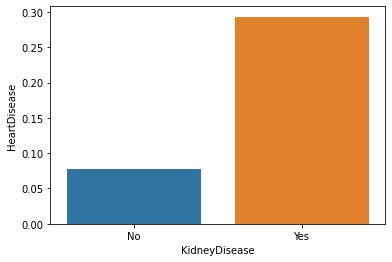

In [95]:
sns.barplot(data=t12.sort_values(by='HeartDisease'),x='KidneyDisease',y='HeartDisease')

#### SkinCancer	

In [96]:
df['SkinCancer'].value_counts()/l*100

No     90.675589
Yes     9.324411
Name: SkinCancer, dtype: float64

In [97]:
t13=dummy_df[["HeartDisease",'SkinCancer']].groupby(['SkinCancer'],as_index=False).mean()

<AxesSubplot:xlabel='SkinCancer', ylabel='HeartDisease'>

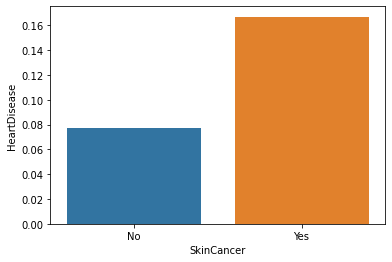

In [98]:
sns.barplot(data=t13.sort_values(by='HeartDisease'),x='SkinCancer',y='HeartDisease')

#### Asthma	

In [99]:
df['Asthma'].value_counts()/l*100

No     86.593912
Yes    13.406088
Name: Asthma, dtype: float64

In [100]:
t14=dummy_df[["HeartDisease",'Asthma']].groupby(['Asthma'],as_index=False).mean()

<AxesSubplot:xlabel='Asthma', ylabel='HeartDisease'>

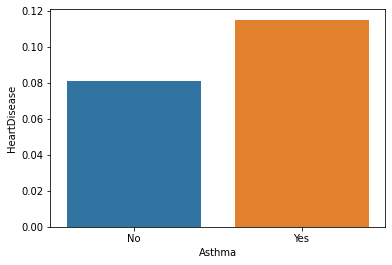

In [101]:
sns.barplot(data=t14.sort_values(by='HeartDisease'),x='Asthma',y='HeartDisease')

In [102]:
## So asthama is also a good indicator but not as strong as skin cancer and kidney disease

#### PhysicalActivity	

In [103]:
df['PhysicalActivity'].value_counts()/l*100

Yes    77.536234
No     22.463766
Name: PhysicalActivity, dtype: float64

In [104]:
t15=dummy_df[["HeartDisease",'PhysicalActivity']].groupby(['PhysicalActivity'],as_index=False).mean()

<AxesSubplot:xlabel='PhysicalActivity', ylabel='HeartDisease'>

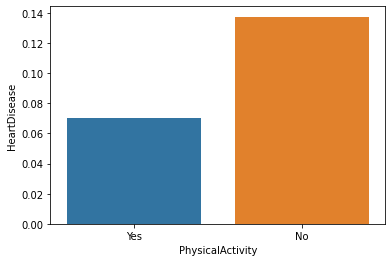

In [105]:
sns.barplot(data=t15.sort_values(by='HeartDisease'),x='PhysicalActivity',y='HeartDisease')

In [106]:
## Doing some physical activity can reduce the risk for heart disease

#### GenHealth	

In [107]:
df['GenHealth'].value_counts()/l*100

Very good    35.603433
Good         29.121468
Excellent    20.901515
Fair         10.843509
Poor          3.530074
Name: GenHealth, dtype: float64

In [108]:
t16=dummy_df[["HeartDisease",'GenHealth']].groupby(['GenHealth'],as_index=False).mean()

<AxesSubplot:xlabel='GenHealth', ylabel='HeartDisease'>

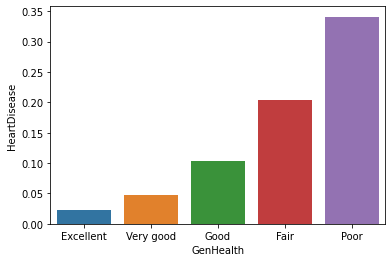

In [109]:
sns.barplot(data=t16.sort_values(by='HeartDisease'),x='GenHealth',y='HeartDisease')

In [110]:
## The general health is affected with heart disease, which comes as so surprise. Although we can see that even with the general
## health in the good region, the heart disease cases are not zero, i.e., your general health being good doesnt exempt you from
## the risk of having a heart issue.

## Model building

### Encoding

In [111]:
df

,HeartDisease,Smoking,Stroke,PhysicalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,BMI_cat,SleepTime_cat,Mean_Age
0,No,Yes,No,3.0,No,Female,White,Yes,Yes,Very good,Yes,No,Yes,Uwt,Low,57
1,No,No,Yes,0.0,No,Female,White,No,Yes,Very good,No,No,No,N,Normal,80
2,No,Yes,No,20.0,No,Male,White,Yes,Yes,Fair,Yes,No,No,Owt,Normal,67
3,No,No,No,0.0,No,Female,White,No,No,Good,No,No,Yes,N,Low,77
4,No,No,No,28.0,Yes,Female,White,No,Yes,Very good,No,No,No,N,Normal,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,Yes,No,7.0,Yes,Male,Hispanic,Yes,No,Fair,Yes,No,No,Owt,Low,62
319791,No,Yes,No,0.0,No,Male,Hispanic,No,Yes,Very good,Yes,No,No,Owt,Low,37
319792,No,No,No,0.0,No,Female,Hispanic,No,Yes,Good,No,No,No,N,Low,47
319793,No,No,No,0.0,No,Female,Hispanic,No,No,Good,No,No,No,O,High,27


In [112]:
encoded_df = df.copy()

##Label Encoding
le = preprocessing.LabelEncoder()
cols=['HeartDisease', 'Smoking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

for i in cols:
    encoded_df[i] = le.fit_transform(encoded_df[i])
    
le_1=le.fit(encoded_df['GenHealth'])
le_1.classes_ = np.array(['Poor', 'Fair','Good','Very good','Excellent'])   ## to assign 0 to Poor and 4 to Excellent
encoded_df['GenHealth'] = le_1.transform(encoded_df['GenHealth'])

## One hot encoding
encoded_df=pd.concat([encoded_df,pd.get_dummies(encoded_df['Race'],prefix='Race',drop_first=True)], axis=1)
encoded_df=pd.concat([encoded_df,pd.get_dummies(encoded_df['Diabetic'],prefix='Diabetic',drop_first=True)], axis=1)
encoded_df=pd.concat([encoded_df,pd.get_dummies(encoded_df['BMI_cat'],prefix='BMI',drop_first=True)], axis=1)
encoded_df=pd.concat([encoded_df,pd.get_dummies(encoded_df['SleepTime_cat'],prefix='SleepTime',drop_first=True)], axis=1)

encoded_df.drop(columns=['Race','Diabetic','BMI_cat','SleepTime_cat'],axis=1,inplace=True)

In [113]:
from IPython.display import display
with pd.option_context('display.max_columns', 30):
    display(encoded_df)

,HeartDisease,Smoking,Stroke,PhysicalHealth,DiffWalking,Sex,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,Mean_Age,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),BMI_N,BMI_O,BMI_Owt,BMI_Uwt,SleepTime_Low,SleepTime_Normal
0,0,1,0,3.0,0,0,1,3,1,0,1,57,0,0,0,0,1,0,1,0,0,0,0,1,1,0
1,0,0,1,0.0,0,0,1,3,0,0,0,80,0,0,0,0,1,0,0,0,1,0,0,0,0,1
2,0,1,0,20.0,0,1,1,1,1,0,0,67,0,0,0,0,1,0,1,0,0,0,1,0,0,1
3,0,0,0,0.0,0,0,0,2,0,0,1,77,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,0,0,0,28.0,1,0,1,3,0,0,0,42,0,0,0,0,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,1,0,7.0,1,1,0,1,1,0,0,62,0,0,1,0,0,0,1,0,0,0,1,0,1,0
319791,0,1,0,0.0,0,1,1,3,1,0,0,37,0,0,1,0,0,0,0,0,0,0,1,0,1,0
319792,0,0,0,0.0,0,0,1,2,0,0,0,47,0,0,1,0,0,0,0,0,1,0,0,0,1,0
319793,0,0,0,0.0,0,0,0,2,0,0,0,27,0,0,1,0,0,0,0,0,0,1,0,0,0,0


### Standardization

In [114]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [115]:
X=encoded_df.drop(columns=['HeartDisease'],axis=1)
y=encoded_df['HeartDisease']

col=X.columns

In [116]:
encod_stand_df = sc.fit_transform(X)
es_df = pd.DataFrame(encod_stand_df, columns = col)

### Train test split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(es_df,y,test_size =0.2,random_state = 42)

### Creating evaluation metrics

In [118]:
def plot_confusion_matrix(model,X_test,y_test,normalize=False):
    """
        Computes and plots the confusion matrix.         
        
        
        Parameters
        ----------
        
        model : ML model
            A trained model for which ROC is to be computed
        X_test: pandas.DataFrame
            Testing data for independent variables(features)
        y_test: pandas.Series
            Testing data for target variables
        normalize : boolean, default=False
            To normalize the matrix
        
    """
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    classes=["No", "Yes"]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [119]:
def plot_roc(model,X_test,y_test,plot_threshold=False,t=0.5):
    """
        Computes and plots the ROC curve and AUC. It also plots a given threshold value        
        
        
        Parameters
        ----------
        
        model : ML model
            A trained model for which ROC is to be computed
        X_test: pandas.DataFrame
            Testing data for independent variables(features)
        y_test: pandas.Series
            Testing data for target variables
        plot_threshold : boolean, default=False
            Whether to plot the given threshold or not.
        t : float, default=0.5
            Threshold value to plot on the graph
    """
    
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, thresh = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    

    # margins for text threshold
    y_text_margin=0.05
    x_text_margin=0.2
    
    
    x_thresh, y_thresh = fpr[np.argmin(abs(thresh - t))], tpr[np.argmin(abs(thresh - t))]
    
    ## np.argmin(abs(thresh - t)) will give you the index of the min element in the array (thresh-t)
    ## since 'thresh' array wont have the exact threshold 't' in it, so we need the
    ## one which is the closest (if t is in thresh then (thresh - t) would be zero and the min in abs(thresh - t) )

    # Roc curve
    plt.plot(fpr, tpr,lw=2,label='ROC curve (AUC = %0.2f)' % auc,linestyle='-')
    
    # Reference line
    plt.plot([0, 1], [0, 1],label="Random guess",color='red',lw=2, linestyle='--')
    
    # Plotting threshold
    if plot_threshold:
    
        plt.axhline(y=y_thresh,lw=2,color='black',linestyle=':')
        plt.axvline(x=x_thresh,lw=2,color='black',linestyle=':')
        
        # text for threshold
        if x_thresh > 0.5 and y_thresh > 0.5:
            plt.text(x=x_thresh - x_text_margin, y=y_thresh - y_text_margin,s='Threshold : {:.2f}'.format(t))
        elif x_thresh <= 0.5 and y_thresh <= 0.5:
            plt.text(x=x_thresh + x_text_margin, y=y_thresh + y_text_margin,s='Threshold : {:.2f}'.format(t))
        elif x_thresh <= 0.5 < y_thresh:
            plt.text(x=x_thresh + x_text_margin, y=y_thresh - y_text_margin,s='Threshold : {:.2f}'.format(t))
        elif x_thresh > 0.5 >= y_thresh:
            plt.text(x=x_thresh - x_text_margin, y=y_thresh + y_text_margin,s='Threshold : {:.2f}'.format(t))
        
        plt.plot(x_thresh, y_thresh, 'ro')  # redpoint of threshold on the ROC curve
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc=0)

In [120]:
def plot_prc(model,X_test,y_test):
    """
        Computes and plots the precision-recall curve and AUC.        
        
        
        Parameters
        ----------
        
        model : ML model
            A trained model for which ROC is to be computed
        X_test: pandas.DataFrame
            Testing data for independent variables(features)
        y_test: pandas.Series
            Testing data for target variables
        
    """
    
    y_pred_proba = model.predict_proba(X_test)[::,1]
    prec, rec, thresh = precision_recall_curve(y_test,  y_pred_proba)
    auc_val = average_precision_score(y_test, y_pred_proba)

    
    rand = len(y_test[y_test==1]) / len(y_test)
    plt.plot([0, 1], [rand, rand],color='red', linestyle='--', label='Random')
    plt.plot(rec, prec, marker='.', label='PR curve (AUC = %0.2f)' % auc_val,linestyle='-',color='orange')
    

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc=0)
    

### Model

#### Random Forest

In [121]:
from sklearn.metrics import roc_auc_score

In [123]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train,y_train)


y_pred = model_rf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("\n\t\t\tClassification report\n",classification_report(y_test, y_pred))
print("auc " ,roc_auc_score(y_test, y_pred))

Accuracy: 0.9043606060132272

			Classification report
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     58367
           1       0.37      0.13      0.20      5592

    accuracy                           0.90     63959
   macro avg       0.65      0.56      0.57     63959
weighted avg       0.87      0.90      0.88     63959

auc  0.555652736337358


In [ ]:
## Since this is an imbalanced dataset, so we focus on better precision or recall than accuracy of the minority class. 
## Recall is much preferred in this case since its better to detect a heart patient at the cost of more False positives rather
## than high precision where we might ignore a lot of True cases (heart risk patients) to improve our correct predictions.

## (Its better to tell a false result to a no heart risk patient than telling a heart patient, as the former might cause 
## unnecessary doctor visit but the later might lead to the ignore of an underlying disease, which is obviously much worse.)

In [124]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.set_params(n_estimators=500, class_weight="balanced",max_depth=30,min_samples_split= 30,min_samples_leaf=24)
model_rf.fit(X_train,y_train)

y_pred = model_rf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("\n\t\t\tClassification report\n",classification_report(y_test, y_pred))
print("auc " ,roc_auc_score(y_test, y_pred))

Accuracy: 0.7453993964883754

			Classification report
               precision    recall  f1-score   support

           0       0.97      0.74      0.84     58367
           1       0.23      0.79      0.35      5592

    accuracy                           0.75     63959
   macro avg       0.60      0.76      0.60     63959
weighted avg       0.91      0.75      0.80     63959

auc  0.7634870106726632


In [ ]:
## here we have good recall for the minority class

In [ ]:
print('Cross validation score: ',cross_val_score(model_rf, X_train, y_train, cv=10).mean())

In [ ]:
plot_confusion_matrix(model_rf,X_test,y_test,normalize=True)

In [ ]:
plot_prc(model_rf,X_test,y_test)

In [ ]:
plot_roc(model_rf,X_test,y_test)

#### Logistic Regression

In [125]:
model_lr = LogisticRegression(random_state=0,class_weight='balanced', max_iter=800)

model_lr.fit(X_train, y_train)    

y_pred = model_lr.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("\n\t\t\tClassification report\n",classification_report(y_test, y_pred))
print("auc " ,roc_auc_score(y_test, y_pred))

Accuracy: 0.7511530824434404

			Classification report
               precision    recall  f1-score   support

           0       0.97      0.75      0.85     58367
           1       0.23      0.78      0.35      5592

    accuracy                           0.75     63959
   macro avg       0.60      0.76      0.60     63959
weighted avg       0.91      0.75      0.80     63959

auc  0.7637289862848745


In [ ]:
plot_confusion_matrix(model_lr,X_test,y_test,normalize=True)

In [ ]:
plot_prc(model_lr,X_test,y_test)

#### Naive Bayes

In [ ]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

y_pred=model_nb.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))
print("\n\t\t\tClassification report\n",classification_report(y_test, y_pred))

In [ ]:
plot_confusion_matrix(model_nb,X_test,y_test,normalize=True)

In [ ]:
plot_prc(model_nb,X_test,y_test)

## Conclusion

Random Forest is performing the best out of the other models on this dataset. It is giving us a good recall for the minority class and AUC for the PR curve is also the best amongst others.Based on this modelling I have made a web app using Flask and deployed it on [AWS](http://ec2-54-91-30-108.compute-1.amazonaws.com:8080/) (and [Heroku](https://risk-heart-disease.herokuapp.com/)) where you could answer some questions about yourself and have the model predict whether you have a risk of heart disease or not. Check out the project [here](https://github.com/prateek-py/Heart-disease-risk-Prediction)